# Lecture 32: Single-Server Queueing Systems in Python

```{note}
This lecture details how to simulate a single-server queueing system developing the simulation logic along with its implemenation in Python
```

---

## Simulation Logic

$$
\begin{aligned}
1.\ & \textbf{Procedure } \text{ssq}(n, A, S) \\
2.\ & \text{// SYSTEM STATUS} \\
3.\ & \varphi \gets 0 \quad \text{// server idle/busy} \\
4.\ & j \gets 0 \quad \text{// queue length} \\
5.\ & \text{// SYSTEM DYNAMICS} \\
6.\ & T_a \gets \{\} \quad \text{// customer arrival time} \\
7.\ & T_s \gets \{\} \quad \text{// customer service start time} \\
8.\ & T_d \gets \{\} \quad \text{// customer departure time} \\
9.\ & \text{// SYSTEM LOG} \\
10.\ & T_o \gets \{\} \quad \text{// event time (arrival/service initiation/departure)} \\
11.\ & Q \gets \varnothing \quad \text{// queue } \\
11.\ & \Phi \gets \{\} \quad \text{// server status at event time} \\
12.\ & J \gets \{\} \quad \text{// queue length at event time} \\
13.\ & \text{// INITIALIZATION} \\
14.\ & t \gets 0 \quad \text{// simulation clock} \\
15.\ & i \gets 0 \quad \text{// index of customer in service} \\
16.\ & k \gets 0 \quad \text{// customers serviced} \\
17.\ & t_a \gets A_1 \quad \text{// next arrival event time} \\
18.\ & t_d \gets \infty \quad \text{// next departure event time} \\
20.\ & \textbf{while } k < n \ \textbf{do} \\
21.\ & \quad \textbf{if } t_a \leq t_d \ \textbf{then} \quad \text{// time jump to next customer arrival event} \\
22.\ & \quad\quad e \gets \text{a} \\
23.\ & \quad\quad t \gets t_a \\
24.\ & \quad \textbf{else} \quad \text{// time jump to next customer departure event} \\
25.\ & \quad\quad e \gets \text{d} \\
26.\ & \quad\quad t \gets t_d \\
27.\ & \quad \textbf{end if} \\
28.\ & \quad \textbf{if } e = \text{a} \ \textbf{then} \quad \text{// update system status for customer arrival} \\
29.\ & \quad\quad \varphi \gets \varphi \\
30.\ & \quad\quad j \gets j + 1 \\
31.\ & \quad\quad \textbf{if } \varphi = 0 \ \textbf{then} \\
32.\ & \quad\quad\quad e \gets \text{s} \\
33.\ & \quad\quad \textbf{end if} \\
34.\ & \quad\quad T_a \gets T_a \cup \{t\} \\
35.\ & \quad\quad T_o \gets T_o \cup \{t\} \\
36.\ & \quad\quad Q \gets Q \cup \{i+j\} \\
37.\ & \quad\quad \Phi \gets \Phi \cup \{\varphi\} \\
38.\ & \quad\quad J \gets J \cup \{j\} \\
39.\ & \quad\quad t_a \gets (i+j+1 \leq n) \ ? \ t + A_{i+j+1} : \infty \\
40.\ & \quad \textbf{else if } e = \text{d} \ \textbf{then} \quad \text{// update system status for customer departure} \\
41.\ & \quad\quad \varphi \gets 0 \\
42.\ & \quad\quad j \gets j \\
43.\ & \quad\quad \textbf{if } j = 0 \ \textbf{then} \\
44.\ & \quad\quad\quad t_d \gets \infty \\
45.\ & \quad\quad \textbf{else} \\
46.\ & \quad\quad\quad e \gets \text{s} \\
47.\ & \quad\quad \textbf{end if} \\
48.\ & \quad\quad T_d \gets T_d \cup \{t\} \\
49.\ & \quad\quad T_o \gets T_o \cup \{t\} \\
50.\ & \quad\quad \Phi \gets \Phi \cup \{\varphi\} \\
51.\ & \quad\quad J \gets J \cup \{j\} \\
52.\ & \quad\quad k \gets k + 1 \\
53.\ & \quad \textbf{end if} \\
54.\ & \quad \textbf{if } e = \text{s} \ \textbf{then} \quad \text{// update system status for customer service initiation} \\
55.\ & \quad\quad \varphi \gets 1 \\
56.\ & \quad\quad j \gets j - 1 \\
57.\ & \quad\quad i \gets \text{pop}(Q) \\
58.\ & \quad\quad T_s \gets T_s \cup \{t\} \\
59.\ & \quad\quad T_o \gets T_o \cup \{t\} \\
60.\ & \quad\quad \Phi \gets \Phi \cup \{\varphi\} \\
61.\ & \quad\quad J \gets J \cup \{j\} \\
62.\ & \quad\quad t_d \gets t + S_i \\
63.\ & \quad \textbf{end if} \\
64.\ & \textbf{end while} \\
65.\ & d \gets \dfrac{\sum_{i=1}^{n}(T_{s_i} - T_{a_i})}{n} \quad \text{// average delay} \\
66.\ & q \gets \dfrac{J \cdot T_j}{t} \quad \text{// average queue length} \\
67.\ & u \gets \dfrac{\Phi \cdot T_o}{t} \quad \text{// average utilization} \\
68.\ & \textbf{return } \{d, q, u\}
\end{aligned}
$$

In [3]:
# Single Simulation Outcomes
n = 6
A = [0.4, 1.2, 0.5, 1.7, 0.2, 1.6, 0.2, 1.4, 1.9]
S = [2.0, 0.7, 0.2, 1.1, 3.7, 0.6, 1.0, 1.0, 1.0]
ssq(n, A, S)

Arrival      :        X -1 [0]
Service      :        X 0 []
Arrival      :        X 0 [1]
Arrival      :        X 0 [1, 2]
Departure    :    0 X   [1, 2]
Service      :        X 1 [2]
Departure    :    1 X   [2]
Service      :        X 2 []
Departure    :    2 X   []
Arrival      :        X 2 [3]
Service      :        X 3 []
Arrival      :        X 3 [4]
Departure    :    3 X   [4]
Service      :        X 4 []
Arrival      :        X 4 [5]
Arrival      :        X 4 [5, 6]
Arrival      :        X 4 [5, 6, 7]
Departure    :    4 X   [5, 6, 7]
Service      :        X 5 [6, 7]
Arrival      :        X 5 [6, 7, 8]
Departure    :    5 X   [6, 7, 8]
Service      :        X 6 [7, 8]


(0.95, 1.217, 0.902)


Summary Statistics (1000 runs, n=100)

     mean  median   range      sd     iqr  skewness  kurtosis
d  3.9383   3.652  17.869  1.3823  1.4760    2.2989   11.5548
q  3.1686   2.922  15.685  1.1715  1.2452    2.3591   12.3087
u  0.7981   0.797   0.268  0.0351  0.0470    0.1216    0.0623

Note: kurtosis is excess kurtosis.



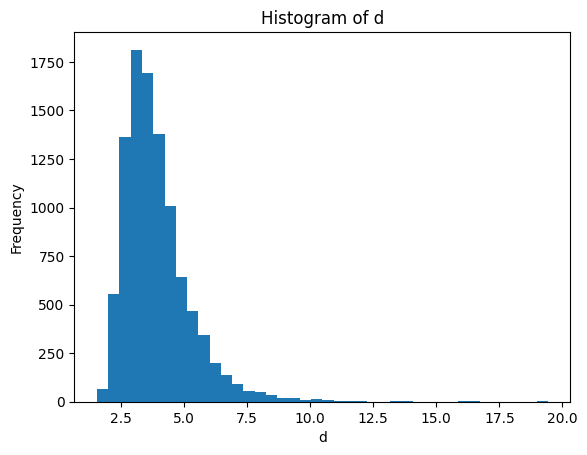

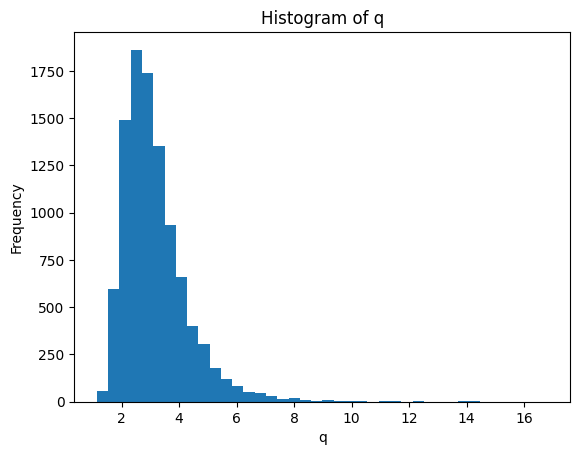

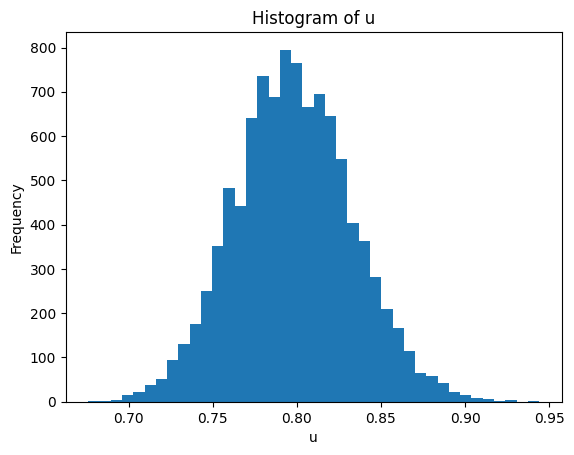

In [5]:
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

def simulate(sims=1000, n=100, lam=0.8, mu=1.0):
    """
    Run Monte Carlo simulation of SSQ using exponential inter-arrivals and service times.
    
    Parameters
    ----------
    sims : int
        number of simulations (default=1000)
    n : int
        number of customers per run (default=100)
    lam : float
        arrival rate λ
    mu : float
        service rate μ
    
    Returns
    -------
    df : pandas.DataFrame
        Results with columns ['d','q','u']
    """
    # Random simulations
    results = []
    for k in range(sims):
        rng = random.Random(k)
        # Generate n+5 to avoid indexing issues in ssq
        A = [rng.expovariate(lam) for _ in range(n+5)]
        S = [rng.expovariate(mu) for _ in range(n+5)]
        d, q, u = ssq(n, A, S, silent=True)
        results.append((d, q, u))
    return pd.DataFrame(results, columns=["d","q","u"])

# Descriptive statistics
def describe_series(x: pd.Series):
    arr = np.asarray(x, dtype=float)
    mean = float(np.mean(arr))
    median = float(np.median(arr))
    rng = float(np.max(arr) - np.min(arr))
    sd = float(np.std(arr, ddof=1))
    iqr = np.percentile(arr, 75) - np.percentile(arr, 25)
    skew = np.mean((arr - mean)**3) / (sd**3) if sd > 0 else np.nan
    kurt = np.mean((arr - mean)**4) / (sd**4) - 3 if sd > 0 else np.nan
    return {
        "mean": mean, "median": median, "range": rng,
        "sd": sd, "iqr": iqr, "skewness": skew, "kurtosis": kurt
    }

def summarize_df(df: pd.DataFrame):
    return pd.DataFrame({col: describe_series(df[col]) for col in df.columns}).T

# Run and visualize
if __name__ == "__main__":
    df = simulate(sims=10000, n=1000, lam=0.8, mu=1.0)
    summary = summarize_df(df).round(4)
    print("\nSummary Statistics (1000 runs, n=100)\n")
    print(summary.to_string())
    print("\nNote: kurtosis is excess kurtosis.\n")
    
    # Histograms
    for metric in ["d","q","u"]:
        plt.figure()
        plt.hist(df[metric], bins=40)
        plt.title(f"Histogram of {metric}")
        plt.xlabel(metric)
        plt.ylabel("Frequency")
        plt.show()